<a href="https://www.kaggle.com/code/ahmadhamad55/titanic-competition-my-first-project?scriptVersionId=116166262" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Table of Contents

1. [Introduction](#1.-Introduction)
2. [Loading and Inspecting data](#2.-Loading-and-Inspecting-data)
3. [Explanatory Data Anlaysis](#3.-Explanatory-Data-Analysis)
4. [Data preprocessing](#4.-Data-preprocessing)
5. [Model fitting](#5.-Model-fitting)
6. [Performance Analysis](#6.-Performance-Analysis)
7. [Grid searching to better performance](#7.-Grid-searching-to-better-performance)
8. [Test data preparation](#8.Test-data-preparation)
9. [Prediction and Submission](#9.-Prediction-and-submission)     
    

# 1. Introduction

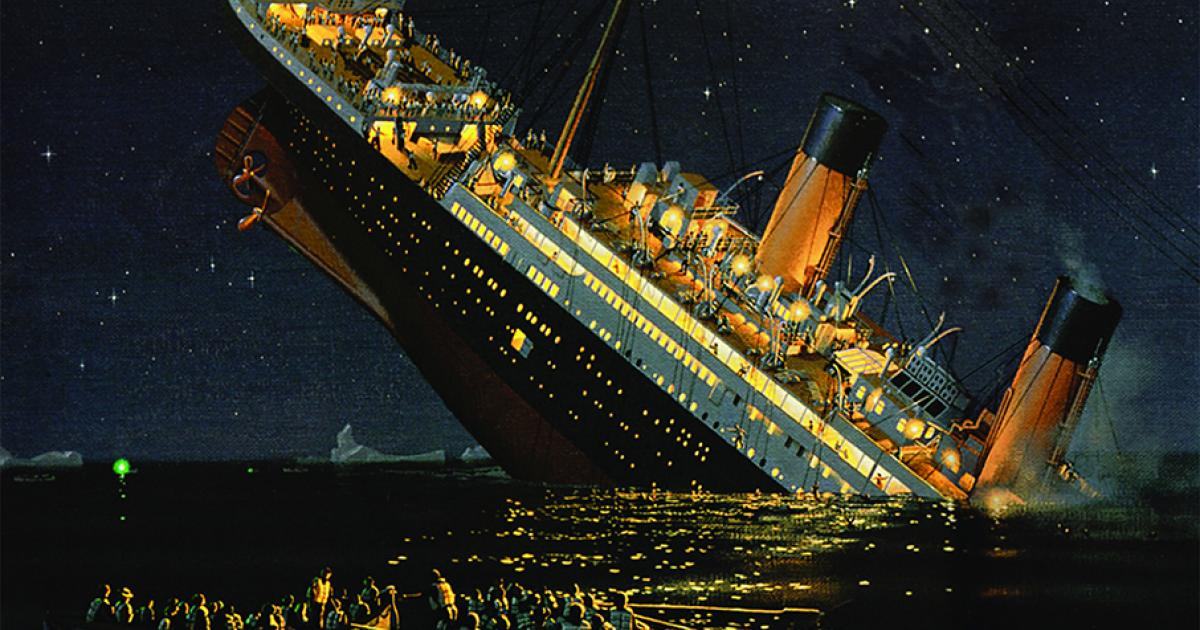

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we want to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc)

# 2. Loading and Inspecting data  

In [1]:
#Import Pandas
import pandas as pd

#load train dataset
train_data=pd.read_csv('../input/titanic/train.csv')

#shape of train_data
train_shape=train_data.shape
print(train_shape)

#looking at the fisrt 10 rows of trainning data set
train_data.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# 3. Explanatory Data Analysis





As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical features. This can be fixed with some preprocessing, but before we do that, let's learn about the dataset a bit more to see if there are other dataset issues that need to be fixed.  

In [2]:
#print train_data summary statistics :train_data_summary
train_data_summary=train_data.describe()
train_data_summary


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
#print train_data information : train_data_info
train_data_info=train_data.info()
train_data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
print('Passenger class:',*train_data['Pclass'].unique())
print('Survived status: \n',train_data['Survived'].value_counts())
print('Sex number:\n',train_data['Sex'].value_counts())
print('number of parents/cildren:',*train_data['Parch'].unique())
print('number of siblings/spouces:',*train_data['SibSp'].unique())
print('City:',*train_data['Embarked'].unique())

Passenger class: 3 1 2
Survived status: 
 0    549
1    342
Name: Survived, dtype: int64
Sex number:
 male      577
female    314
Name: Sex, dtype: int64
number of parents/cildren: 0 1 2 5 3 4 6
number of siblings/spouces: 1 0 3 4 2 5 8
City: S C Q nan


We observe that:  
* Number of no survived: 549 greater than number of survived: 342  
* Number of male: 577 greater than number of female: 314  
* Number of parents/children  takess values in {0,1,2,3,4,5,6}  
* Number of siblings/spouces takes values in {0,1,2,3,4,5,8}  
* Three passenger classes labeled {1,2,3}  
* Three embarked city labeled {S,C,Q} with missing values  
Now,performing some visulazitaions to get more details about dataset.  

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Correlation between all features of the dataset
correlation_matrix=train_data.corr()
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

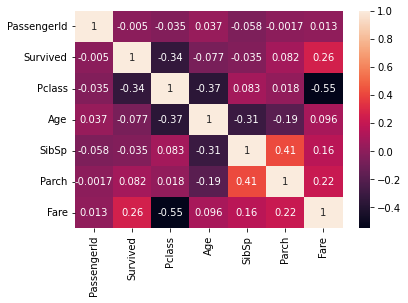

In [6]:
# heatmap 
sns.heatmap(correlation_matrix,annot=True)

* Most features are not correlated since their correlation values are quite small.
* There is a negative (not very strong) correlation between:
   1. Survived and PClass features : -0.34 
   2. Fare and Pclass features  : -0.55
* there is small positive correlation between Survived and Fare features : 0.26 

In [7]:
palette=sns.color_palette("bright")
palette

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

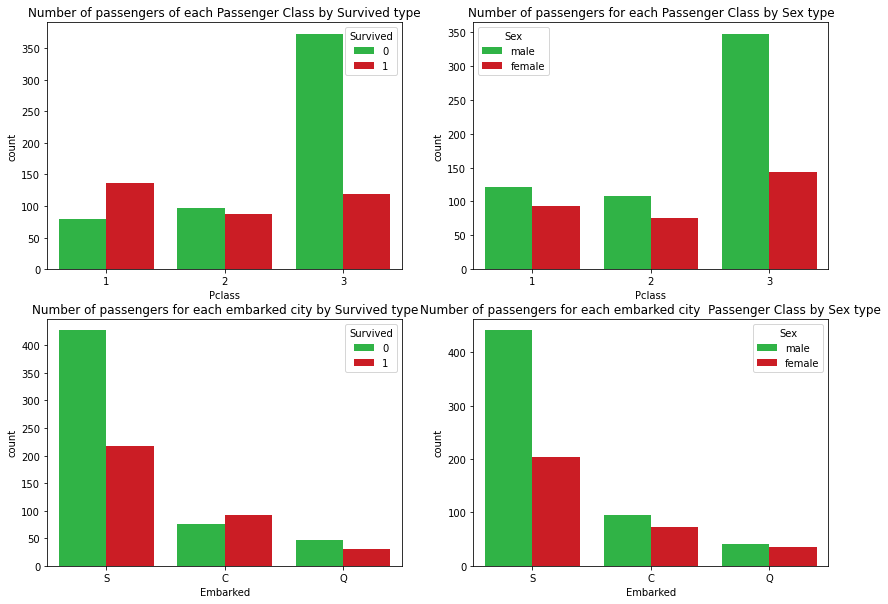

In [8]:

# Countplot of passengers for each passenger class and each embarked city respectively by Survived and Sex type 
import seaborn as sns
import matplotlib.pyplot as plt
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(14,10))

fig1=sns.countplot(data=train_data,x='Pclass',hue='Survived',ax=axes[0][0],palette=palette[2:])
fig1.set(title="Number of passengers of each Passenger Class by Survived type")

fig2=sns.countplot(data=train_data,x='Pclass',hue='Sex',ax=axes[0][1],palette=palette[2:])
fig2.set(title="Number of passengers for each Passenger Class by Sex type")

fig3=sns.countplot(data=train_data,x='Embarked',hue='Survived',ax=axes[1][0],palette=palette[2:])
fig3.set(title="Number of passengers for each embarked city by Survived type")

fig4=sns.countplot(data=train_data,x='Embarked',hue='Sex',ax=axes[1][1],palette=palette[2:])
fig4.set(title="Number of passengers for each embarked city  Passenger Class by Sex type") 

plt.show()

we observe:
* Most passengers who didn't survive was from class 3
* Most passengers of class 3 was male comapring to the two others class
* Most passengers who embarked in city 'S' didn't survive
* Most passengers who embarked in city 'S' was male comapred to the two others cities


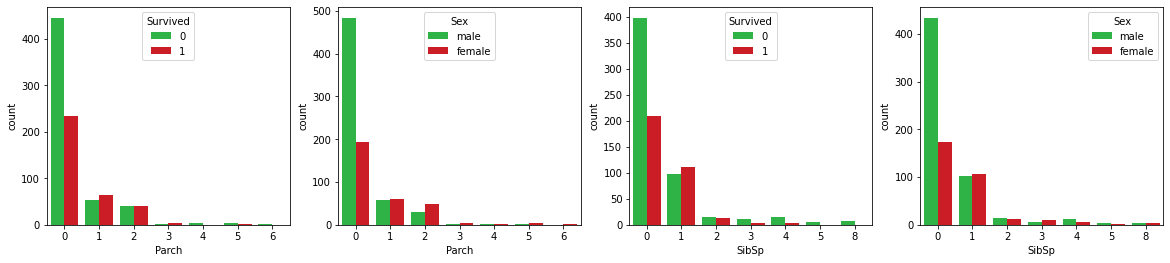

In [9]:
# Countplot of passengers for each passenger class and each embarked city respectively by Survived and Sex type 
fig,axes=plt.subplots(nrows=1,ncols=4,figsize=(20,4))

sns.countplot(data=train_data,x='Parch',hue='Survived',ax=axes[0],palette=palette[2:])
sns.countplot(data=train_data,x='Parch',hue='Sex',ax=axes[1],palette=palette[2:])
sns.countplot(data=train_data,x='SibSp',hue='Survived',ax=axes[2],palette=palette[2:])
sns.countplot(data=train_data,x='SibSp',hue='Sex',ax=axes[3],palette=palette[2:])

plt.show()


To get more precise insight about these two features,we create new column containing all possible values of famliy members,and its distribution using countplot grouped respectively by the survived status and sex type

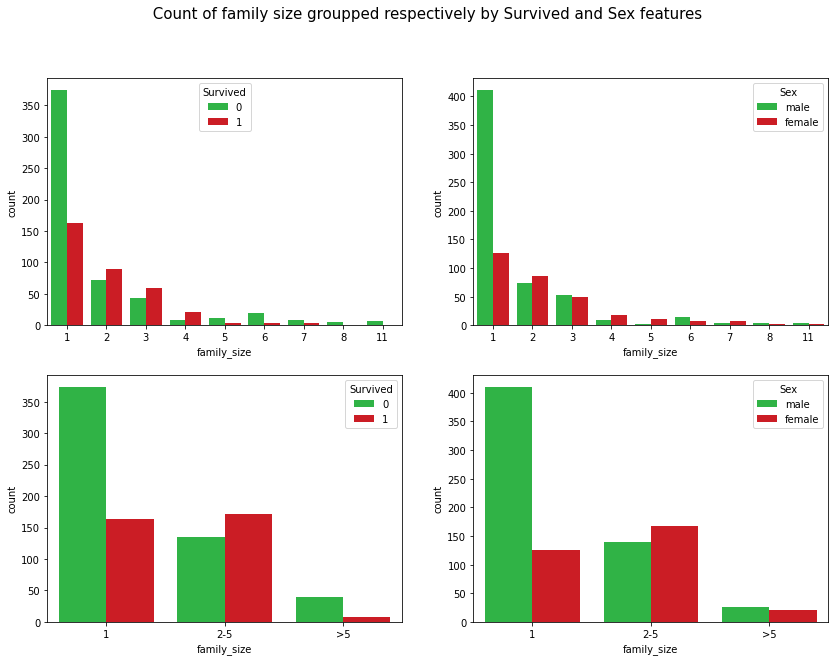

In [10]:
# new column of all possible values of family size
train_data['family_size']=train_data['Parch']+train_data['SibSp']+1

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(14,10))
sns.countplot(data=train_data,x='family_size',hue='Survived',ax=axes[0,0],palette=palette[2:])
sns.countplot(data=train_data,x='family_size',hue='Sex',ax=axes[0,1],palette=palette[2:])

# mapping all possible family size values into new smaller group
map_size={1:'1',2:'2-5',3:'2-5',4:'2-5',5:'2-5',6:'>5',7:'>5',8:'>5',11:'>5'}
train_data['family_size']=train_data['family_size'].map(map_size)

sns.countplot(data=train_data,x='family_size',hue='Survived',ax=axes[1,0],palette=palette[2:],order=['1','2-5','>5'])
sns.countplot(data=train_data,x='family_size',hue='Sex',ax=axes[1,1],palette=palette[2:],order=['1','2-5','>5'])
fig.suptitle(' Count of family size groupped respectively by Survived and Sex features',fontsize=15)
plt.show()

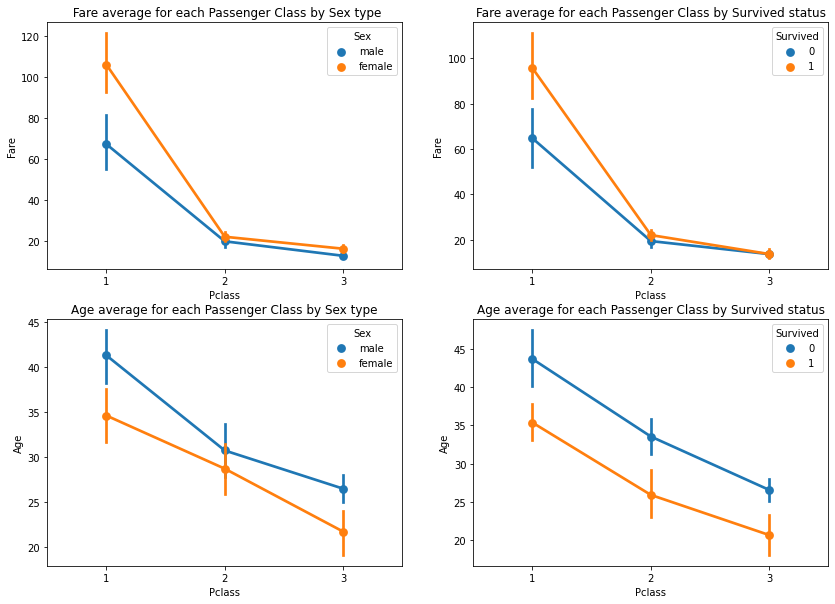

In [11]:
# Pointplot of Fare and Age for each passenger class by Sex and Survived type respictivly
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

fig1=sns.pointplot(data=train_data,x='Pclass',y='Fare',hue='Sex',ax=axes[0][0])
fig1.set(title=" Fare average for each Passenger Class by Sex type")

fig2=sns.pointplot(data=train_data,x='Pclass',y='Fare',hue='Survived',ax=axes[0][1])
fig2.set(title="Fare average for each Passenger Class by Survived status")

fig3=sns.pointplot(data=train_data,x='Pclass',y='Age',hue='Sex',ax=axes[1][0])
fig3.set(title="Age average for each Passenger Class by Sex type")

fig4=sns.pointplot(data=train_data,x='Pclass',y='Age',hue='Survived',ax=axes[1][1])
fig4.set(title="Age average for each Passenger Class by Survived status")

plt.show()

We conclude :
* Passengers of class 1 paid more fares than passenger class 2, followed by passenger class 3 who have the lowest fares
* Female  passangers paid more fares than Man passengers
* Passengers who paid more fares, had bigger chance to survive
* Male passengers were older on average, than female passengers
* Passengers with lower age on average, had bigger chance to survive
* Passengers of class 3 were younger than the other passengers of class 1 and 2



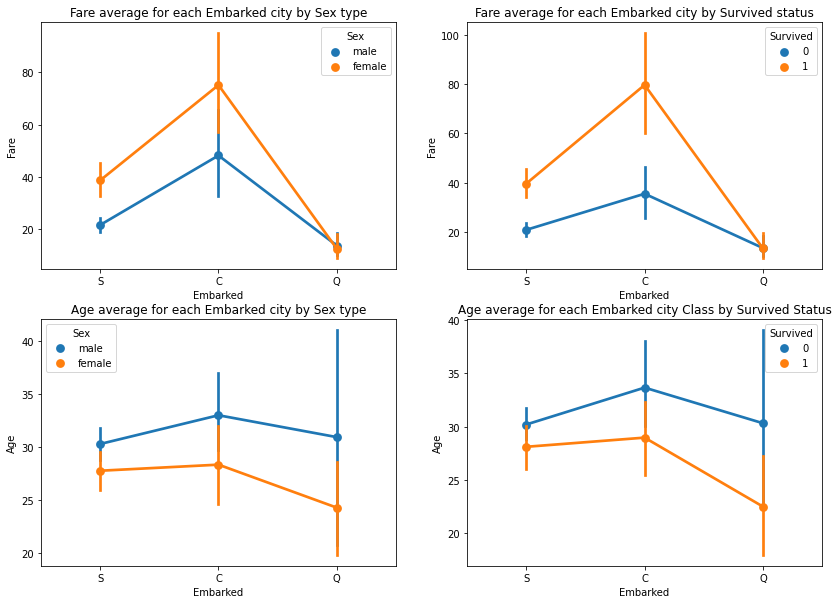

In [12]:
#Boxplot of Fare and Age for each embarkedcity by Sex and Survived type respictivly
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

fig1=sns.pointplot(data=train_data,x='Embarked',y='Fare',hue='Sex',errorbar=None,ax=axes[0][0])
fig1.set(title="Fare average for each Embarked city by Sex type")

fig2=sns.pointplot(data=train_data,x='Embarked',y='Fare',hue='Survived',errorbar=None,ax=axes[0][1])
fig2.set(title="Fare average for each Embarked city by Survived status")

fig3=sns.pointplot(data=train_data,x='Embarked',y='Age',hue='Sex',errorbar=None,ax=axes[1][0])
fig3.set(title="Age average for each Embarked city by Sex type")

fig4=sns.pointplot(data=train_data,x='Embarked',y='Age',hue='Survived',errorbar=None ,ax=axes[1][1])
fig4.set(title="Age average for each Embarked city Class by Survived Status")

plt.show()


We observe :
* As seen before,female passengers paid more fares than male passengers, and fares paid by suvived people was greater than fares paid by passengers who did not survived.
* Passengers who embarked on city 'C', paid more fares than the two others cities.
* Passengers who embarked on city 'C', had average age greater the the two others cities


['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


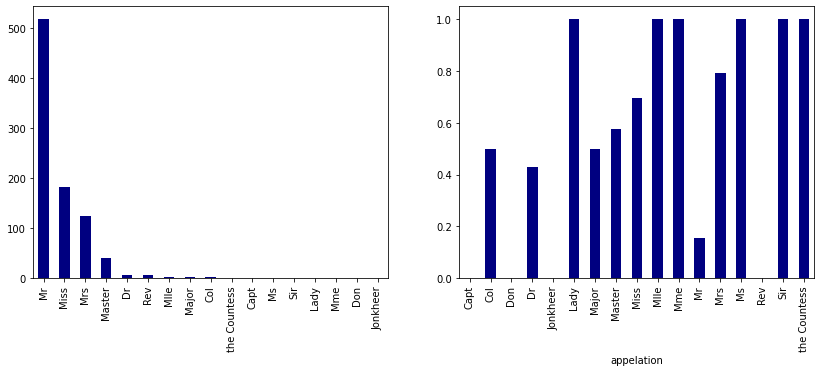

In [13]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(14,5),nrows=1,ncols=2)

# getting titles from names and displaying it with count plot
train_data['appelation']=train_data['Name'].apply((lambda x: x.split(", ")[1].split(".")[0]))
print(train_data['appelation'].unique())

train_data['appelation'].value_counts().plot.bar(ax=ax[0],color='navy')
plt.xticks(rotation=90)

# survived average for each tiitle
grouped=train_data.groupby('appelation')['Survived'].mean().plot.bar(ax=ax[1],color='navy')

plt.show()

According to the figure above, MR, Mrs, Miss and Master are the most frequent titles for passenger names, while other titles are quite samll.Let's represent all the  titles by a new smaller group

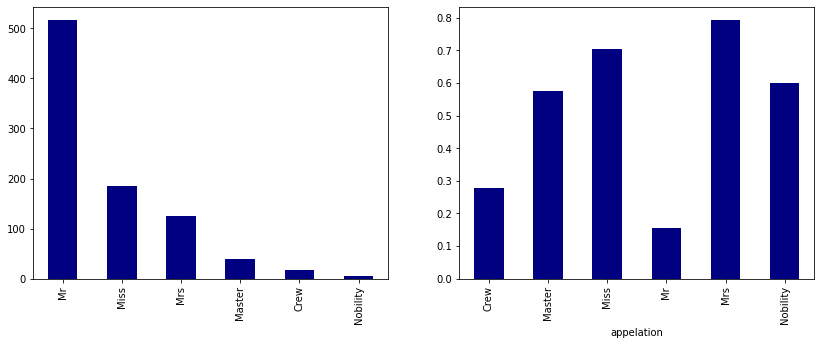

In [14]:
map_app={'Mr':'Mr',
             'Miss':'Miss', 'Ms':'Miss',
             'Mrs':'Mrs', 'Mme':'Mrs',
             'Master':'Master',
             'Dr':'Crew', 'Rev':'Crew', 'Col':'Crew', 'Capt':'Crew', 'Major':'Crew', 
             'Mlle':'Miss', 'the Countess':'Nobility', 'Sir':'Nobility', 'Lady':'Nobility', 'Don':'Nobility', 'Jonkheer':'Nobility'}
train_data['appelation']=train_data['appelation'].map(map_app)

fig,ax=plt.subplots(figsize=(14,5),nrows=1,ncols=2)
plt.xticks(rotation=0)

# getting titles from names and displaying it with count plot
train_data['appelation'].value_counts().plot.bar(ax=ax[0],color='navy')


# survived average for each tiitle
train_data.groupby('appelation')['Survived'].mean().plot.bar(ax=ax[1],color='navy')

plt.show()

As before, we can observe that female passengers have more chance to survive, adding to them the Royal families.

# 4. Data preprocessing

In [15]:
# Check  and out put how many missing values per column 
missing_values=train_data.isnull().sum()
print(missing_values)

# Recall number of observations of train_data
num_obs=train_shape[0]
print('the number of observations is:',num_obs)

# Percentage of missing values 
for obs in missing_values.index:
    if missing_values.loc[obs] != 0 :
        percentage=missing_values.loc[obs]*100/num_obs
        print('the percentage of missing values in {} feature is {} % '.format(obs, round(percentage,2)))
              


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
family_size      0
appelation       0
dtype: int64
the number of observations is: 891
the percentage of missing values in Age feature is 19.87 % 
the percentage of missing values in Cabin feature is 77.1 % 
the percentage of missing values in Embarked feature is 0.22 % 


## Imputation missing values for 'Age'
As we see, the percentage of missing values in this feature is about 20 %. We can perform linear regression ,to fill these missing values but before this, we should just keep all numerical features and dropping the others.

In [16]:
# dropping non numerical features
train_data_num=train_data.drop(labels=['PassengerId','Name','Ticket','Cabin','Embarked','appelation','family_size'],axis=1)

from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
train_data_num['Sex'] = lab.fit_transform(train_data_num['Sex'])
train_data_num.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [17]:
# Import linear regression'
from sklearn.linear_model import LinearRegression

#Initiaite the model 
lr=LinearRegression()
# split data 
X_tr=train_data_num[train_data_num['Age'].isnull()==False]
X_te=train_data_num[train_data_num['Age'].isnull()==True]
Ytrain=X_tr['Age']
Xtrain=X_tr.drop('Age',axis=1)
Xtest=X_te.drop('Age',axis=1)

#fisrt 6 rows of Xtrain
Xtrain.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,1,1,0,7.2500
1,1,1,0,1,0,71.2833
2,1,3,0,0,0,7.9250
3,1,1,0,1,0,53.1000
4,0,3,1,0,0,8.0500


In [18]:
#fitting model
lrmodel=lr.fit(Xtrain,Ytrain)

#make predicition 
Ypred=lrmodel.predict(Xtest)
Xtest['Age']=Ypred

#filling missing values of Ages by the predictions
train_data['Age'].fillna(Xtest['Age'],inplace=True)

# Ensure that no missing values in Age feature
train_data['Age'].isna().sum()

0

## Imputaion Missing values for 'Cabin'

Since 77.1% is a higher percentage of missing values,this feature doesn't affect our analysis and we can drop it from our data.

In [19]:
# drop Cabin feature
train_data.drop(labels=['Cabin'],axis=1,inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,appelation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2-5,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2-5,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2-5,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Mr


## Imputation Missing values for 'Embarked

We have just 2 missing values in this feature, so we can fill them by the most frequent Embarked city.

In [20]:
#filling missing values by most frequent embarked city 
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True)

# Ensre no missing values in our data
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
family_size    0
appelation     0
dtype: int64

Now our data have no missing values.Since sickit learn's package requires numeric data with no missing values, we should convert our interest categorical features into numerical values ,that is features encoding.To do so, we use the pandas get_dummies() function wihch returns the dummy coded data as a pandas dataframe,i.e we obtain new column for each feature value with 1 as precense of this value and 0 otherwise.

In [21]:
dff_train=train_data.drop(labels=['PassengerId','Name','Ticket','SibSp','Parch'],axis=1)

#perform features encodding
df_train=pd.get_dummies(dff_train,prefix=['Sex','Embarked','family_size','appelation'],drop_first=True)
df_train['pclass=2'] = (dff_train['Pclass']==2).astype('int')
df_train['pclass=3'] = (dff_train['Pclass']==3).astype('int')
df_train.drop(labels=['Pclass'],axis=1,inplace=True)

df_train.head()

,Survived,Age,Fare,Sex_male,Embarked_Q,Embarked_S,family_size_2-5,family_size_>5,appelation_Master,appelation_Miss,appelation_Mr,appelation_Mrs,appelation_Nobility,pclass=2,pclass=3
0,0,22.0,7.2500,1,0,1,1,0,0,0,1,0,0,0,1
1,1,38.0,71.2833,0,0,0,1,0,0,0,0,1,0,0,0
2,1,26.0,7.9250,0,0,1,0,0,0,1,0,0,0,0,1
3,1,35.0,53.1000,0,0,1,1,0,0,0,0,1,0,0,0
4,0,35.0,8.0500,1,0,1,0,0,0,0,1,0,0,0,1


from the code above, drop fisrt argument is used to drop duplicate informations from our features. for example, we dropped Embarked_C Feature, but let's say emabrked_Q and Embarked_S have values have 0 as value for some obsercation, that mean this observation doesn't embarked neither in Q nor in S and so we conclude that this observation embarked in c even if we dropped the column information about Embarked_C.


## Features scaling  and splitting Data

Our variables are on different ranges, For instance the age variable is on range while the Sex is on range 1,so  the coefficient found by the model of interst for the first variable would be  much larger than the coefficient for the second variable. This does not really show if the first variable is more important or not.So should apply features scaling,so that  all variables have same scale ,hence, the coefficients  are interpreatable. Not all models need features scaling, it dependes on the mechanic of each model

Here we standarize the variables , all varaiables have mean 0 and stard deviation 1

In [22]:
# Importing  libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
print('Importing libraries is done !')

Importing libraries is done !


In [23]:
# Initiate StandardScaler
scaler=StandardScaler()

# spliting data
X=df_train.drop('Survived',axis=1)
y=df_train['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# Scaling data 
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# 5. Model fitting
  ## Logistic Regression
  **This model is a gradient descending based algoprithm,hence scaling features is necessarly here.**

In [24]:
# Initiate LogisticRegression
logreg=LogisticRegression()

# fitting  LogisticRegreesion model  on scaled data
logreg.fit(X_train_scaled,y_train)
y_pred_logreg=logreg.predict(X_test_scaled)
y_pred_logreg

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1])

## Random Forest Classifier 
**This model is  a tree-based algorithm ,hence no need to scale the data.**

In [25]:
# Initiate RandomForest classifier with number of estimators set as 100
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred_randfor = random_forest.predict(X_test)
y_pred_randfor

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1])

# 6. Performance Analysis

To know wihch model perfom weel, we evaluate performance of each model : we calcule the confusion matrix for each model,we plot its ROC curve, quantifing its performance by calculating the are under the curve know as AUC score. 

<img align=midle>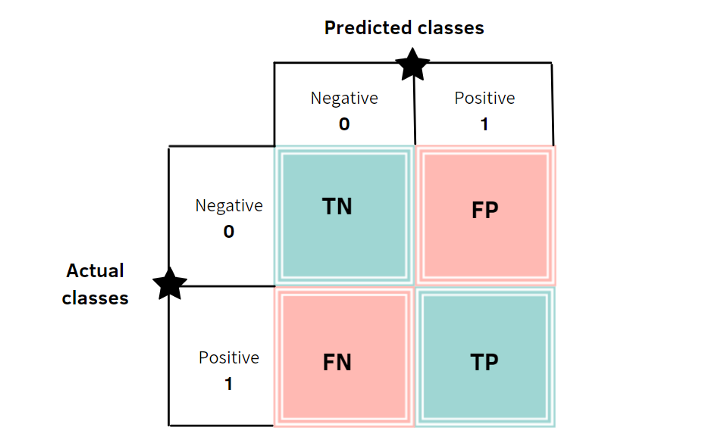

For our study case: 

* **TP** : number of actual survived passengers **and** predicted as survived
* **FN** : numer of actual survived passengers **but** predicted  as not survived
* **FP** : number of actual victims  **but** predicted as survived
* **TN** : number of actual victims **and** predicted as not survived

In [26]:
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve

# confusion matrix of Logistic regression : conf_logreg
conf_logreg=confusion_matrix(y_test,y_pred_logreg)
display('The confusion matrix of Logistic regression :',conf_logreg)

# confusion matrix of Random forest classifier : conf_randfor
conf_randfor=confusion_matrix(y_test,y_pred_randfor)
display('The confusion matrix of Ranndom forest classifier :',conf_randfor)



'The confusion matrix of Logistic regression :'

array([[120,  19],
       [ 19,  65]])

'The confusion matrix of Ranndom forest classifier :'

array([[129,  10],
       [ 19,  65]])

In [27]:
######## FOR LOGISTIC REGRESSION
# TN,TP,FP,FN  
TN_logreg=conf_logreg[0,0]
FP_logreg=conf_logreg[0,1]
FN_logreg=conf_logreg[1,0]
TP_logreg=conf_logreg[1,1]

# Accuracy score 
acc_logreg=(TN_logreg+TP_logreg)/(TN_logreg + FP_logreg + FN_logreg + TP_logreg)

# Sensitivity  score
sensitivity_logreg=TP_logreg/(FN_logreg + TP_logreg)

# Specificity score

specificity_logreg= TN_logreg/(TN_logreg + FP_logreg)
print('For logistic regression :','\n',
      'the accuracy score is',acc_logreg, '\n',
      'the sensitivity score is', sensitivity_logreg,'\n',  
      'the specifity score is',sensitivity_logreg )


For logistic regression : 
 the accuracy score is 0.8295964125560538 
 the sensitivity score is 0.7738095238095238 
 the specifity score is 0.7738095238095238


In [28]:
######## FOR Random forest classifier
# TN,TP,FP,FN  
TN_randfor=conf_randfor[0,0]
FP_randfor=conf_randfor[0,1]
FN_randfor=conf_randfor[1,0]
TP_randfor=conf_randfor[1,1]

# Accuracy score 
acc_randfor=(TN_randfor+TP_randfor)/(TN_randfor + FP_randfor + FN_randfor + TP_randfor)

# Sensitivity  score
sensitivity_randfor=TP_randfor/(FN_randfor + TP_randfor)


# Specificity score
specificity_randfor= TN_randfor/(TN_randfor + FP_randfor)

print('For Random forest classifier:','\n',
      'the accuracy score is',acc_randfor,',ie',round(acc_randfor,2)*100,'% of passengers survived status was correctly predicted by the model','\n',
      'the sensitivity score is', sensitivity_randfor,',ie',round(sensitivity_randfor,2)*100,'% of survived passengers was correctly predicted as survived', '\n',
      'the specifity score is',specificity_randfor,',i.e',round(specificity_randfor,2)*100,'% of victms passengers was correctly predicted as not survived')

For Random forest classifier: 
 the accuracy score is 0.8699551569506726 ,ie 87.0 % of passengers survived status was correctly predicted by the model 
 the sensitivity score is 0.7738095238095238 ,ie 77.0 % of survived passengers was correctly predicted as survived 
 the specifity score is 0.9280575539568345 ,i.e 93.0 % of victms passengers was correctly predicted as not survived


Comparing the two confusion matrix, Random forest classifier perfom better than Logistic Regression since it increases number of **TN** to 129 while decreases number of  **FP** to 19 ,hence  we obtain higher values for accuracy,and  specifity  metrics which are ways to quantify the model fitting

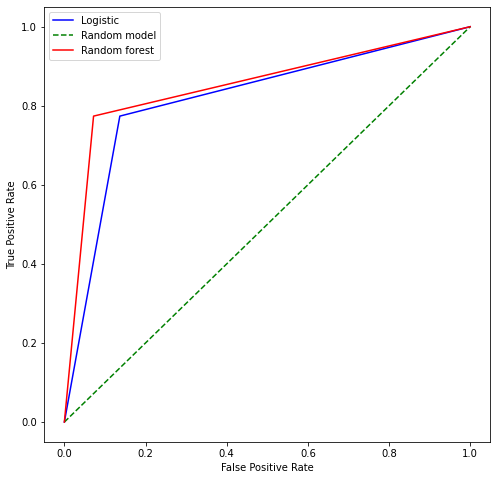

In [29]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(8,8))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
plt.plot(fpr,tpr,'b', label= 'Logistic')
plt.plot([0,1],[0,1],'g--',label='Random model')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_randfor)
plt.plot(fpr,tpr,'r', label= 'Random forest')

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


In [30]:
# AUC-score
print( 'the AUC-score of logistic regression',roc_auc_score(y_test,y_pred_logreg),'\n'
'the AUC-score of Random forest classifier is',roc_auc_score(y_test,y_pred_randfor))

the AUC-score of logistic regression 0.8185594381637546 
the AUC-score of Random forest classifier is 0.8509335388831791


# 7. Grid searching to better performance

 After observing better performance for random forest classifier,note that all defaults parameters of the model are not optimal,so we can do Ranadomized Search to get the optimal values of the parameters we are included in the search.

In [31]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [200,250,300,350,400,450,500,600]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [200, 250, 300, 350, 400, 450, 500, 600],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [32]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
rand_for=RandomForestClassifier()
# search across 100 different combinations, and use all available cores
Rand_CV = RandomizedSearchCV(estimator=rand_for, param_distributions=random_grid,
                              n_iter = 50, scoring='roc_auc', 
                              cv=5, verbose=1, random_state=0, n_jobs=-1)

Rand_CV.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: 

In [ ]:

# extract best parametres and  best AUC-score
print('The best paramters are',Rand_CV.best_params_)
print('The best AUC-score is',Rand_CV.best_score_)

# extract the best model
best_model=Rand_CV.best_estimator_

In [ ]:
# evaluate the best model on the test set
y_new=best_model.predict(X_test)
roc_auc_score(y_test,y_new)

# 8.Test data preparation

We use in this section the best model to predict the pssengers survived status,but first let's preprocess our testdata as we done above with the train data before the new prediction.

In [ ]:
#load test dataset
test_data=pd.read_csv('../input/titanic/test.csv')

#shape of test_data
test_shape=test_data.shape
print(test_shape)

#looking at the first 10 rows of test dataset
test_data.head(10)

In [ ]:
# counting missing values of test data per column
test_data.isna().sum()

## Imputation missing values for 'Cabin'

In [ ]:
# dropping 'cabin' column as done in the train data
test_data.drop(['Cabin'],axis=1,inplace=True)

## Imputation missing values for 'Fare'

In [ ]:
#### filling the only missing value of Fare by the fare mean of the correspondant class 
# getting index of the missing value
index=test_data[test_data['Fare'].isnull()].index

# getting the class of passenger in which his fare is missing
pclass=test_data.loc[index]['Pclass']
print('the class of the passenger, in which his fare is missing, is', pclass.to_list()[0])

# mean of fare of passengers with class 3
mean=test_data[test_data['Pclass']==3]['Fare'].mean()

# filling missing value with mean
test_data['Fare'].fillna(mean,inplace=True)
test_data['Fare'].isna().sum()

## Imputation missing values for 'Age' 

In [ ]:
# dropping non numerical features
test_data_num=test_data.drop(labels=['PassengerId','Name','Ticket','Embarked'],axis=1)

test_data_num['Sex'] = lab.fit_transform(test_data_num['Sex'])
test_data_num.head()

In [ ]:
#Initiaite the model 
lr=LinearRegression()
# split data 
X_tr=test_data_num[test_data_num['Age'].isnull()==False]
X_te=test_data_num[test_data_num['Age'].isnull()==True]
Ytrain=X_tr['Age']
Xtrain=X_tr.drop('Age',axis=1)
Xtest=X_te.drop('Age',axis=1)

#fitting model
linmodel=lr.fit(Xtrain,Ytrain)

#make predicition 
Ypred=linmodel.predict(Xtest)
Xtest['Age']=Ypred

#filling missing values of Ages by the predictions
test_data['Age'].fillna(Xtest['Age'],inplace=True)

# Ensure that no missing values in Age feature
test_data.isna().sum()

In [ ]:
# new column of all possible values of family size
test_data['family_size']=test_data['Parch']+test_data['SibSp']+1

# mapping all possible family size values into new smaller group
test_data['family_size']=test_data['family_size'].map(map_size)

# getting titles from Name 
test_data['appelation']=test_data['Name'].apply((lambda x: x.split(", ")[1].split(".")[0]))
print(test_data['appelation'].unique())

In [ ]:
map_appelation={'Mr':'Mr',
             'Miss':'Miss', 'Ms':'Miss',
             'Mrs':'Mrs',
             'Master':'Master',
             'Dr':'Crew', 'Rev':'Crew', 'Col':'Crew', 'Dona':'Nobility'}
test_data['appelation']=test_data['appelation'].map(map_appelation)

test_data.head()

## Convert categorical data into numerical 

In [ ]:
dff_test=test_data.copy()
#dropping unused features
dff_test.drop(labels=['PassengerId','Name','Ticket','SibSp','Parch'],axis=1,inplace=True)

#perform features encodding
df_test=pd.get_dummies(dff_test,prefix=['Sex','Embarked','family_size','appelation'],drop_first=True)
df_test['pclass=2'] = (dff_test['Pclass']==2).astype('int')
df_test['pclass=3'] = (dff_test['Pclass']==3).astype('int')
df_test.drop(labels=['Pclass'],axis=1,inplace=True)

df_test.head()

# 9. Prediction and submission

In [ ]:
# make prediction
y_sub=best_model.predict(df_test)
print('Our model predict that',y_sub.sum(),' over 418 passengers over have survived')

In [ ]:
# make sumbission
test_data['Survived']=y_sub
submission=test_data[['PassengerId','Survived']]
submission.to_csv('submission.csv',index=False)
print("Your submission was successfully saved!")
